In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.theory.auxiliaryFunctions import getTreeRoot, fromTreeToList

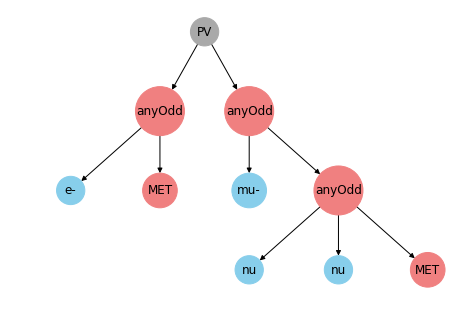

[[e-], [mu-, [nu, nu]]]

In [2]:
el = Element(info="[[['e-']],[['mu-'],['nu','nu']]]")
el.drawTree()
fromTreeToList(el.tree)

In [3]:
T = el.tree
print(T.graph['topologyName'])

11101001101101010000


In [4]:
def treeTovertexList(T,parentNode):
    """
    Creates a nested list of particles from a Tree (DiGraph object).
    The list corresponds to a vertex (list of daughters from the same parent)
    (e.g. parentParticle -> a+b = [a,b]).
    If one of the entries of the daughters is also a parent, the list will be
    nested branch (e.g. parent -> X(->a+b) + c = [ [[a,b]] , c ])
    
    :parameter T: Tree (DiGraph object)
    :parameter parentNode: Name of a parent node (integer)
                     
    :return: list (or nested list) of Particle objects (list)
                         
    """        
    
    if not isinstance(T,nx.DiGraph):
        logger.error("Input musta DiGraph object")
        raise SModelSError()
                     
                     
    #Create vertex list
    vList = []
    children = list(T[parentNode])
    #Create a parallel Tree (each entry in vList is added at the same level/same parent)
    for n in children:
        if not T[n]:  #Entry in vertex is a final particle
            ptc = T.nodes[n]['particle']
            if ptc.Z2parity == 'odd':
                continue
            vList.append(str(ptc))
        else: #Entry in vertex is another branch
            branchList = treeToBranchList(T,parentNode=n)
            vListbranchList
    return vList


def treeToBranchList(T,parentNode):
    """
    Creates a nested list of particles from a Tree (DiGraph object).
    The list should correspond to a series of sequential decays
    of intermediate particles (e.g.  X -> a+b+Y, Y->c = [[a,b],[c]]) 
    
    :parameter T: Tree (DiGraph object)
    :parameter parentNode: Name of a parent node (integer)
                     
    :return: list (or nested list) of Particle objects (list)
                         
    """    
    
    if not isinstance(T,nx.DiGraph):
        logger.error("Input musta DiGraph object")
        raise SModelSError()

    #Create branch list
    bList = []
    children = list(T[parentNode])
    #Create a sequential list (each entry in in bList is a sequence of decays)
    for n in children:
        if T[n]:  #daughter is a final sate:
            vTree = treeTovertexList(T,parentNode=n)
            T = nx.compose(T,vTree)
            momNode = node
        elif isinstance(vList,str):  #entry correspond to an odd particle (e.g. a Z2-odd final state)
            if not vList in particleDict:
                logger.error("Particle %s not found in dictionary" %vList)
                raise SModelSError()
            ptc = particleDict[vList]
            T.add_node(node,particle=ptc)
            if node != parentNode:
                T.add_edge(momNode,node)            
        #Every sequential node added corresponds to going one level down the tree
        #Add digit everytime you go down one level:
        node *= 10
    return T
        

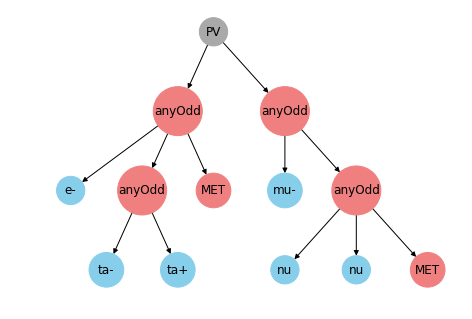

NameError: name 'treeToList' is not defined

In [5]:
el = Element(info="[[ ['e-', [['ta-','ta+']]] ],[['mu-'],['nu','nu']]]")
el.drawTree()
treeToList(el.tree)

In [ ]:
[['mu']] + [['nu','nu','MET']]

In [ ]:
elementStr = "[[[['ta+','ta-'],'e+']],[['mu-']]]"
g = stringToGraph(elementStr)
el = Element(info=g)
el.drawTree()

In [ ]:
eval("[[*],[['*'],[ '*']]]".replace('[*]',"'InclusiveBranch'"))